In [2]:
import pandas as pd
import pywt
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [91]:
data = pd.read_csv('logs.txt',sep=' ',names=['run','a','b','c','agent_2_res','agent_3_res','agent_4_res','lam','fault_2_pos','fault_3_pos','fault_4_pos'],index_col=0)

In [92]:
TP=data.loc[(data.b==1) & (data.fault_3_pos==1)].shape

True Neg

In [93]:
TN=data.loc[(data.b==0) & (data.fault_3_pos==0)].shape

False Pos

In [94]:
FP=data.loc[(data.b==0) & (data.fault_3_pos==1)].shape

False Neg

In [95]:
FN=data.loc[(data.b==1) & (data.fault_3_pos==0)].shape

In [96]:
TPR = TP[0]/(TP[0]+FN[0])

ZeroDivisionError: division by zero

In [97]:
TP[0]

0

In [98]:
FPR = FP[0]/(FP[0]+TN[0])

In [99]:
TPR

1.0

In [100]:
FPR

0.6245

In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.loc[(data.a==0) & (data.fault_2_pos==1)])

,a,b,c,agent_2_res,agent_3_res,agent_4_res,lam,fault_2_pos,fault_3_pos,fault_4_pos
run,,,,,,,,,,
1,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
2,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
7,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
8,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
9,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
12,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
13,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
15,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1
17,0,0,1,2.260605,12.427063,161.419209,0.000005,1,1,1


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.loc[(data.b>0)])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.loc[(data.b>0)])

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
fpr,tpr,thre=metrics.roc_curve(y_true=data.a.values,y_score=data.fault_2_pos.values)

In [ ]:
tpr

In [ ]:
fpr

In [ ]:
data.c.values

In [ ]:
data.fault_4_pos.values

In [ ]:
68/100

In [62]:
data.loc[data.b>0]

,a,b,c,agent_2_res,agent_3_res,agent_4_res,lam,fault_2_pos,fault_3_pos,fault_4_pos
run,,,,,,,,,,


In [4]:
[i for i in range(0,10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

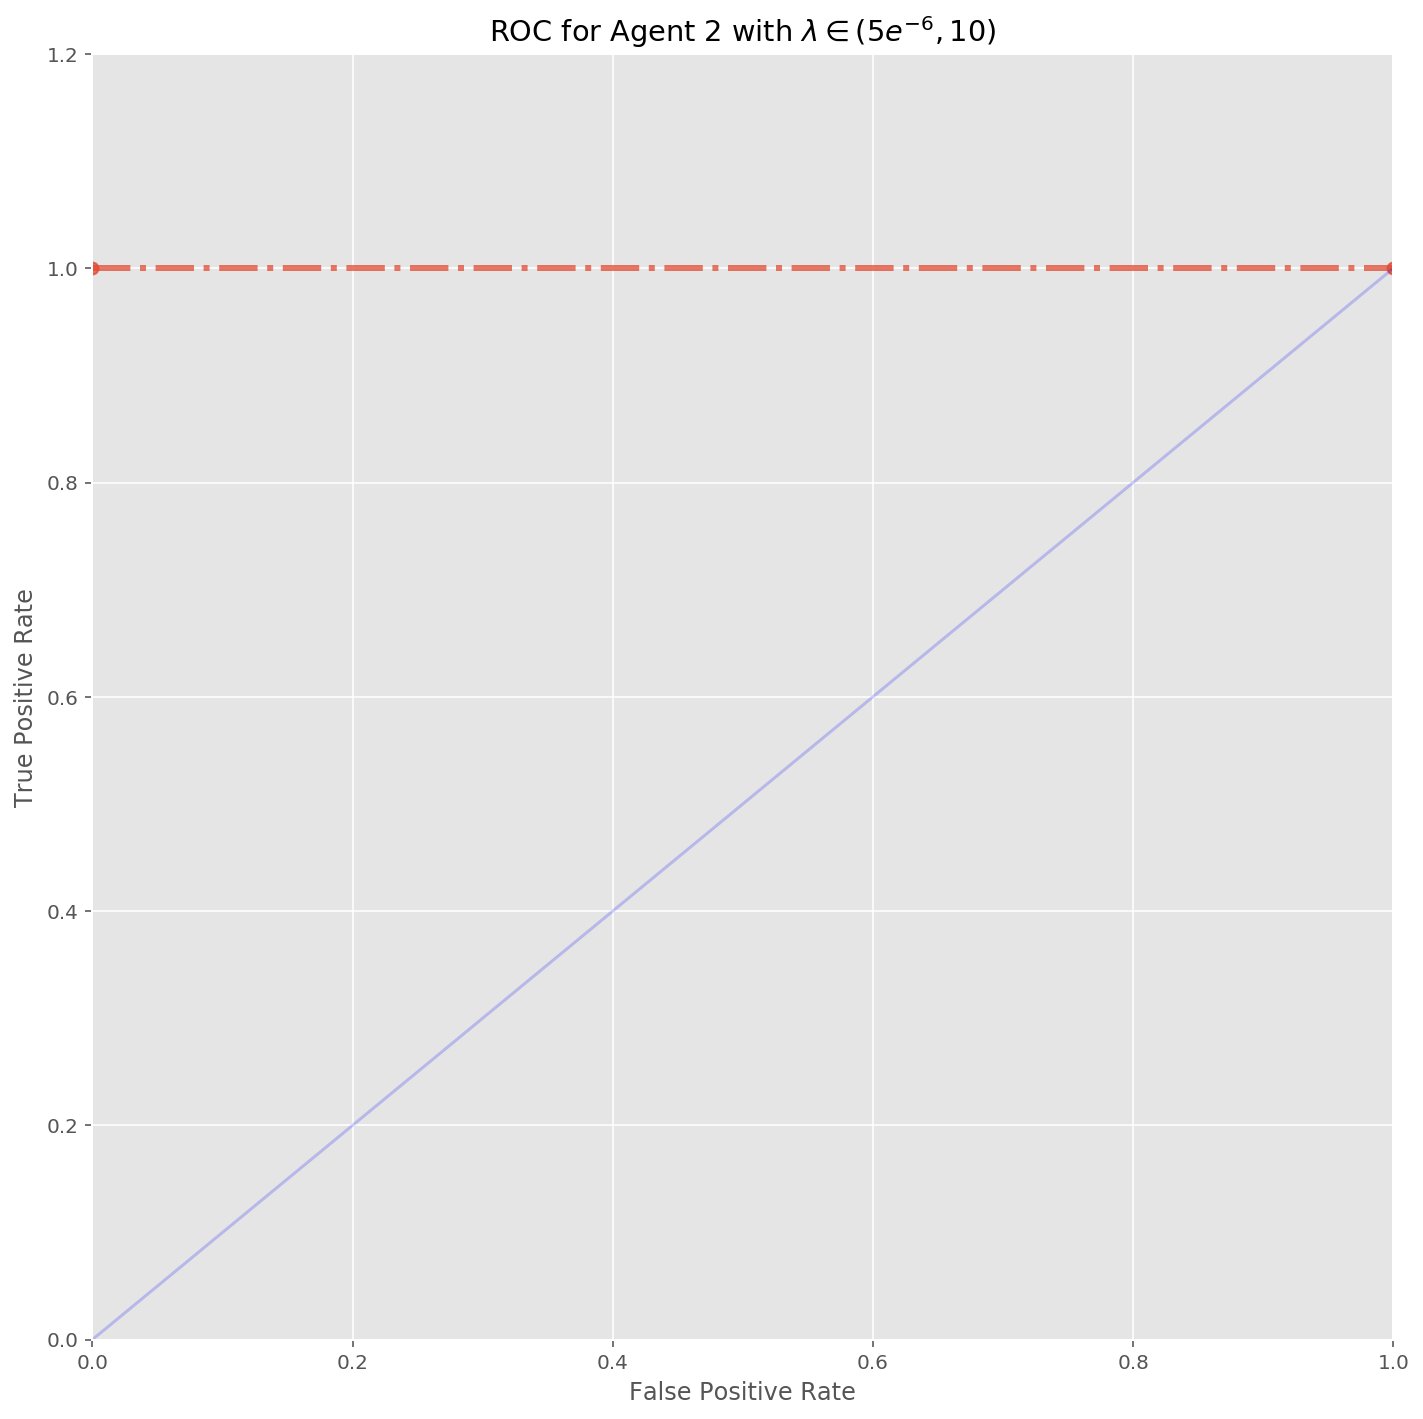

In [31]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(0,10)],[1]*10,'o-.',linewidth=3,alpha=0.75)
plt.plot(0,1,'r')
plt.plot([i for i in range(0,10)],[i for i in range(0,10)],'b',alpha=0.2)
plt.xlim([0,1])
plt.ylim([0,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Agent 2 with $\lambda \in (5e^{-6}, 10)$')
plt.tight_layout()
plt.savefig('roc_agent_2.pdf')

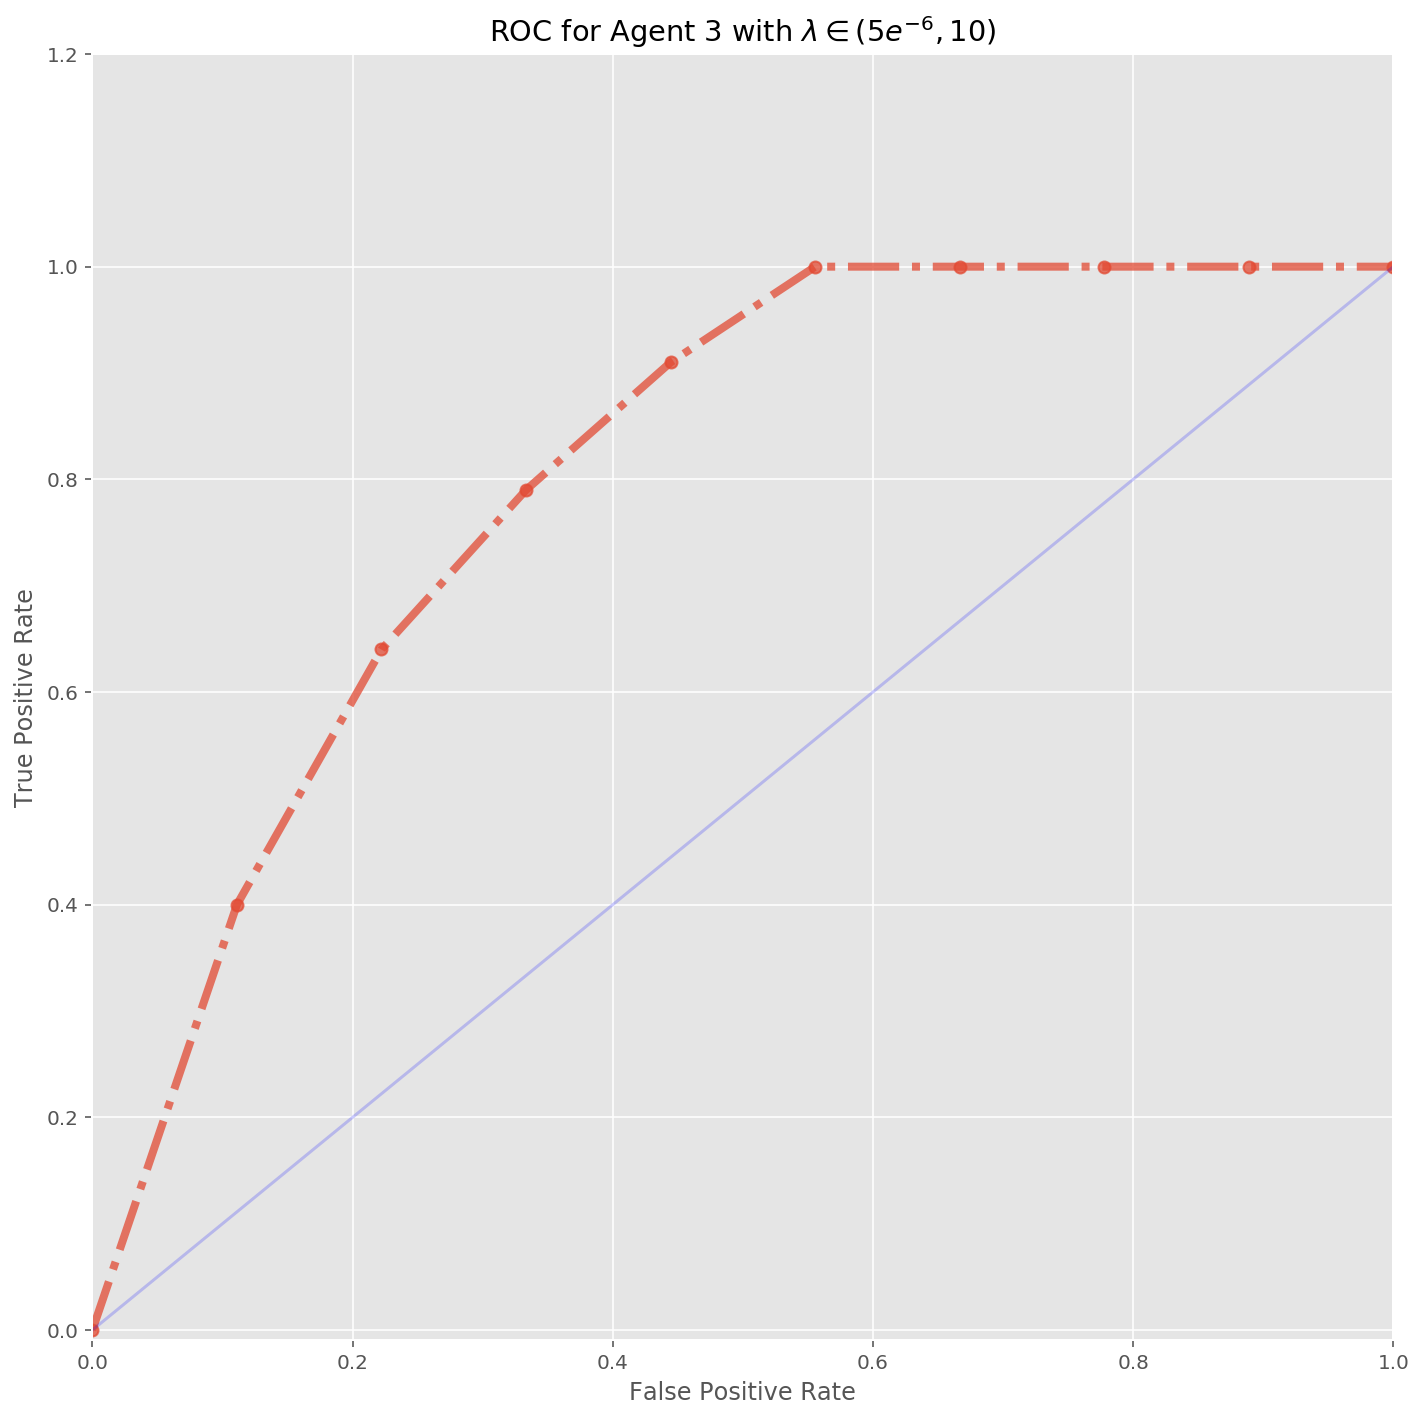

In [56]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1,10),[0, 0.4, 0.64, 0.79, 0.91, 1, 1, 1, 1, 1],'o-.',linewidth=4,alpha=0.75)
plt.plot(0,1,'r')
plt.plot([i for i in range(0,10)],[i for i in range(0,10)],'b',alpha=0.2)
plt.xlim([0,1])
plt.ylim([-0.009,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Agent 3 with $\lambda \in (5e^{-6}, 10)$')
plt.tight_layout()
plt.savefig('roc_agent_3.pdf')

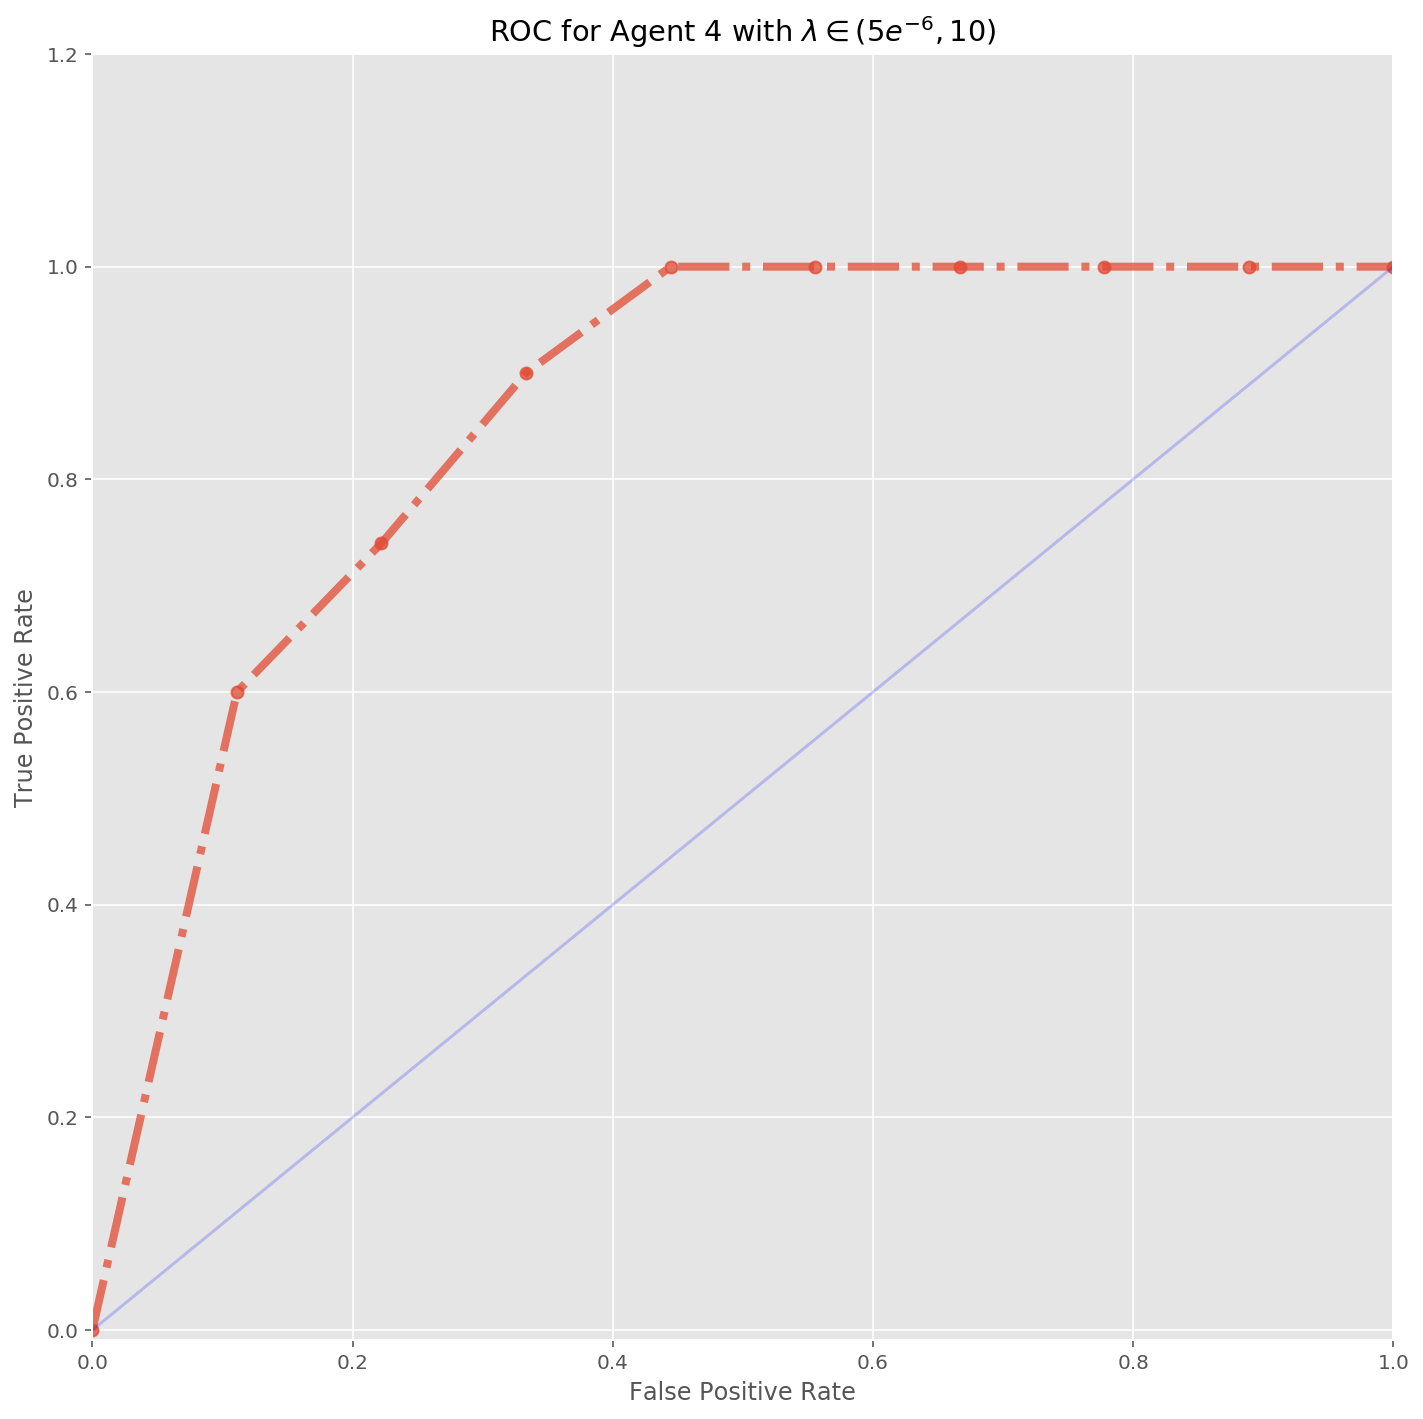

In [54]:
plt.figure(figsize=(10,10))
plt.plot(np.linspace(0,1,10),[0, 0.6, 0.74, 0.9, 1, 1, 1, 1, 1, 1],'o-.',linewidth=4,alpha=0.75)
plt.plot(0,1,'r')
plt.plot([i for i in range(0,10)],[i for i in range(0,10)],'b',alpha=0.2)
plt.xlim([0,1])
plt.ylim([-0.009,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for Agent 4 with $\lambda \in (5e^{-6}, 10)$')
plt.tight_layout()
plt.savefig('roc_agent_4.pdf')